In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [270]:
class Hebb():
    
    def __init__(self):
        pass
        
    def fit(self, x,y):
        
        w = np.zeros((x.shape[1],y.shape[1]))
        for i in range(x.shape[0]):
            w += x[i].reshape((-1,1)) @ y[i].reshape((1,-1))

        self.w = w
             
        
        
    def predict(self, x_test, activation = 'bipolar'):
        '''
        activation can be 
        -> bipolar  -1,0,1  for less0, 0, more0
        -> binary    0,1    for less0, more0
        -> th
        '''
        prediction = []
    
        for elem in x_test:
            data = elem.reshape((1,-1))
            y_pred = data @ self.w

            if activation == 'bipolar':
                result = np.zeros(y_pred.shape)[0]

                result[y_pred[0] > 0] =1
                result[y_pred[0] < 0] =-1

            prediction.append(result)
            
        prediction = np.array(prediction)
        
        return prediction
        

# Generatin Data set

In [273]:
data = [[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]
label_onehot = [[1,0], [1,0], [0,1],[0,1]]

In [274]:
data = np.array(data)
label_onehot = np.array(label_onehot)

In [275]:
# bipolarization

data[data==0] = -1
data

array([[ 1, -1, -1, -1],
       [-1,  1, -1, -1],
       [-1, -1,  1, -1],
       [-1, -1, -1,  1]])

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
x_train, y_train = data, label_onehot


In [278]:
x_test = [[1,1,-1,-1],[0,1,-1,-1]]
y_test = [[1,0],[0,1]]
x_test = np.array(x_test)
y_test = np.array(y_test)

# Training the model

Note that the target must be in one hot format

In [279]:
model = Hebb()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)

In [280]:
y_pred_label

array([0, 0])

In [281]:
from sklearn.metrics import confusion_matrix

In [282]:
confusion_matrix(y_pred_label, np.argmax(y_test, axis=1))

array([[1, 1],
       [0, 0]])

# Fonts data set

In [283]:
from scipy.io import loadmat

In [329]:
data = loadmat('Fonts.mat')['fonts']
data = data[0,0]

In [330]:
data.shape

()

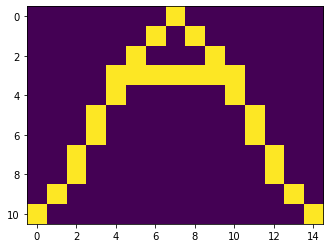

In [331]:
plt.imshow(data[0][:,:,0])

In [390]:
label = [[1,0],[1,0],[0,1],[0,1]]
label = np.array(label)
label[label==0] = -1
dataset = []
for i in range(2):
    for k in range(2):
        dataset.append(data[i][:,:,k])
        
dataset = np.array(dataset)
    

In [391]:
dataset.shape

(4, 11, 15)

In [392]:
label

array([[ 1, -1],
       [ 1, -1],
       [-1,  1],
       [-1,  1]])

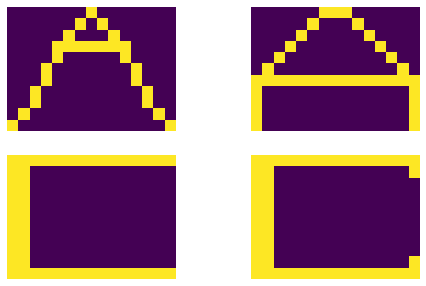

In [393]:
fig = plt.figure(figsize=(8,5))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(dataset[i])
    ax.axis('off')

In [394]:
x_train = dataset.reshape(4,-1)
y_train = np.array(label)

In [395]:
model = Hebb()
model.fit(x_train, y_train)

In [396]:
x_train.shape

(4, 165)

In [401]:
model.predict([x_train[0]])

array([[ 1., -1.]])

### Generating smaple data set (with noise)

In [460]:
indeces = np.random.randint(4, size=(200))
x_test = []
y_test = []
classes = np.array([[1,0],[0,1]])

In [461]:
for ind in indeces:
    y_test.append(label[ind])
    rand = np.random.random(x_train[0].shape)
    rand = rand>0.70

    new = x_train[ind].copy()
    new[rand] = 0
    x_test.append(new)

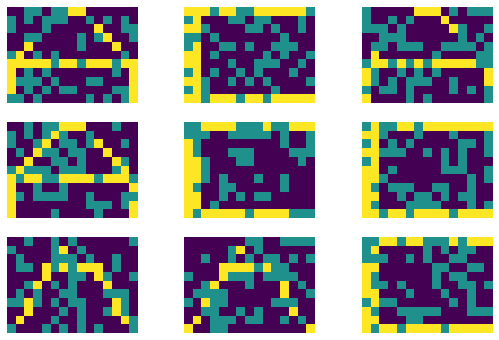

In [462]:
fig = plt.figure(figsize=(9,6))
for ind in range(9):
    ax = fig.add_subplot(3,3,ind+1)
    ax.imshow(x_test[ind].reshape((11,15)))
    ax.axis('off')


In [463]:
y_pred = model.predict(x_test)
y_pred_label= np.argmax(y_pred, axis=1)

In [464]:
confusion_matrix(y_pred_label, np.argmax(y_test, axis=1))

array([[103,   0],
       [  0,  97]])

<font color='green'>text</font>